**Harsha Somaya**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 2b: 3D Scatter Plots and Rotation Matrices
## Task 1: Setup, Data Import and 3D Scatter Plots

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [39]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [8,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/tmp/ipykernel_2074/3276286463.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/tmp/ipykernel_2074/3276286463.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


### 1b) Import the Data
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Print the ndarray.

In [40]:
file1=np.genfromtxt ('data/gauss_3d.csv', delimiter=",")   
print(file1)

[[  -1.878   -1.013   73.627]
 [ -13.059   17.36    41.08 ]
 [ -12.641   -3.435  174.669]
 [ -15.365   34.323  607.439]
 [  -5.673  -14.979  598.393]
 [ -21.508  -21.41   973.77 ]
 [  -1.276  -19.761  817.145]
 [ -13.806   -8.358  301.274]
 [  -8.405  -11.787  470.952]
 [ -11.247   34.341  605.098]
 [  -2.689    0.103   75.917]
 [ -20.301  -15.14   668.435]
 [ -11.612   21.716  166.265]
 [ -11.92    -3.798  173.865]
 [  -4.331  -13.553  479.397]
 [ -15.499   18.138    6.781]
 [ -10.862   14.35   -15.52 ]
 [ -14.389   -1.524  145.707]
 [  -9.789   26.113  252.389]
 [  -7.086    6.937  -57.971]
 [ -15.503   29.254  350.007]
 [  -4.276   12.541   31.791]
 [  -5.492   28.382  313.531]
 [  -7.488    6.641  -22.467]
 [  -5.496  -13.296  579.077]
 [ -13.419   41.741  993.796]
 [ -10.614   -3.187  146.908]
 [ -14.679    2.017   57.476]
 [ -11.339   -5.506  225.864]
 [  -7.348    1.949   39.089]
 [ -13.458    8.64    17.061]
 [ -11.984    8.027   16.783]
 [ -13.436   14.915   30.182]
 [ -14.226

## Task 2: 3D graphing

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled. 
2. Use dots instead of a solid line.

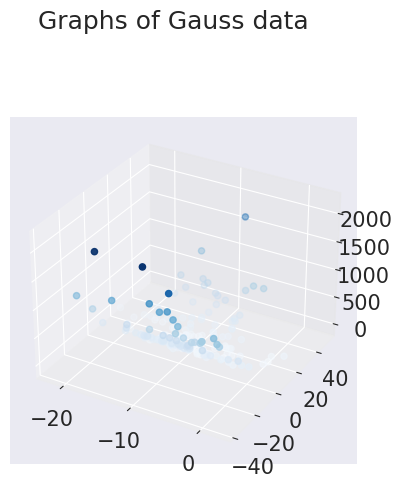

In [41]:
# %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
x=file1[:,0]
y=file1[:,1]
z=file1[:,2]
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.suptitle("Graphs of Gauss data", y=1.12)
# ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Blues');


## Task 2: Rotation

### 2a) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [42]:
# homogenizedData1=np.hstack(file1,np.ones((file1.shape[0],1)))
homogenizedData = np.append(file1, np.array([np.ones(file1.shape[0], dtype=int)]).T, axis=1)
print(homogenizedData [:5])

[[ -1.878  -1.013  73.627   1.   ]
 [-13.059  17.36   41.08    1.   ]
 [-12.641  -3.435 174.669   1.   ]
 [-15.365  34.323 607.439   1.   ]
 [ -5.673 -14.979 598.393   1.   ]]


<img src="img/Rotation-Matrix.png" align="right" width="200"/>

### 2b) Design a rotation matrix

1. Design a transformation matrix that rotates the dataset 30 degrees about the Y axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - [Trigonometric functions](https://numpy.org/doc/1.18/reference/routines.math.html)
  - Print your matrix


In [43]:
y = np.radians(30)
print( np.array([[np.cos(y), 0, np.sin(y),0], [0, 1, 0,0], [-np.sin(y), 0, np.cos(y),0],[0,0,0,1]]))

[[ 0.86603  0.       0.5      0.     ]
 [ 0.       1.       0.       0.     ]
 [-0.5      0.       0.86603  0.     ]
 [ 0.       0.       0.       1.     ]]


In [44]:
def rotateTransformX(x):
    return np.array([1, 0, 0, 0,0, np.cos(np.radians(x)), -np.sin(np.radians(x)), 0,0, np.sin(np.radians(x)), np.cos(np.radians(x)),0,0,0,0,1]).reshape(4, 4)

# pitch
def rotateTransformY(y):
    y = np.radians(y)
    return ( np.array([[np.cos(y), 0, np.sin(y),0], [0, 1, 0,0], [-np.sin(y), 0, np.cos(y),0],[0,0,0,1]]))
# roll
def rotateTransformZ(z):
    return np.array([np.cos(np.radians(z)), -np.sin(np.radians(z)), 0,0, np.sin(np.radians(z)), np.cos(np.radians(z)), 0, 0, 0,0, 1,0,0,0,0,1]).reshape(4, 4)

### 2c) Rotate data and Visualize Results in 2D

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and rotated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the rotated data in different colors.
  - <i>If you implemented a function in the previous lab, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

[[  35.1871    -1.013     64.70185    1.     ]
 [   9.23057   17.36      42.10582    1.     ]
 [  76.38707   -3.435    157.58829    1.     ]
 [ 290.41302   34.323    533.74011    1.     ]
 [ 294.28354  -14.979    521.06004    1.     ]
 [ 468.25853  -21.41     854.06356    1.     ]
 [ 407.46745  -19.761    708.30633    1.     ]
 [ 138.68065   -8.358    267.81394    1.     ]
 [ 228.19706  -11.787    412.0589     1.     ]
 [ 292.80881   34.341    529.65374    1.     ]
 [  35.62976    0.103     67.09055    1.     ]
 [ 316.63632  -15.14     589.03219    1.     ]
 [  73.07621   21.716    149.79571    1.     ]
 [  76.60948   -3.798    156.53151    1.     ]
 [ 235.94774  -13.553    417.33548    1.     ]
 [ -10.03203   18.138     13.62202    1.     ]
 [ -17.16677   14.35      -8.00971    1.     ]
 [  60.39226   -1.524    133.38046    1.     ]
 [ 117.71698   26.113    223.46979    1.     ]
 [ -35.12216    6.937    -46.66136    1.     ]
 [ 161.57751   29.254    310.86645    1.     ]
 [  12.19238 

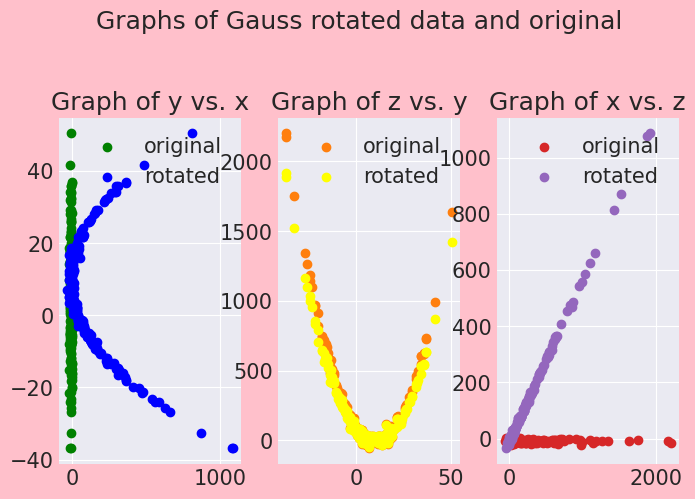

In [47]:
x=file1[:,0]
y=file1[:,1]
z=file1[:,2]
# print(rotateTransformX(30))
# print("homophilic\n",homogenizedData[:5])
# newx=(rotateTransformX(30) @ homogenizedData.T).T #(3,3) * (200,3)= (3,3) * (3,200)= (3,200)=(200,3)
# print(newx.shape)
# newx=newx[:,0]
# print(newx.shape)

# print("newx\n",newx[:10],"\n")
# print("x\n",x[:10],"\n")

new=(rotateTransformY(30)@(homogenizedData.T)).T #(4,4) * (200,4)= (4,4) * (4,200)= (4,200)=(200,4)
print(new)

# newz=(rotateTransformZ(30)@(homogenizedData.T)).T #(4,4) * (200,4)= (4,4) * (4,200)= (4,200)=(200,4)
# newz=newz[:,2]

fig, axs = plt.subplots(1, 3, sharex='col',facecolor="pink")
fig.suptitle("Graphs of Gauss rotated data and original", y=1.12)

#orginal

axs[0].scatter(x, y, color="green", label="original")
axs[0].set_title('Graph of y vs. x')

axs[1].scatter(y, z, color='tab:orange',label="original")
axs[ 1].set_title('Graph of z vs. y')

axs[2].scatter(z, x, color='tab:red', label="original")
axs[2].set_title('Graph of x vs. z')
# print(newmatrix[:5])

#transofrmed
newx = new[:,0]
newy = new[:,1]
newz = new[:,2]

axs[0].scatter(newx, newy, color="blue",label="rotated")

axs[1].scatter(newy, newz, color="yellow",label="rotated")

axs[2].scatter(newz, newx, color="tab:purple",label="rotated")
axs[0].legend()
axs[1].legend()
axs[2].legend();
 

### 2d) Visualize Rotated Data in 3D

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled.  
2. Use dots instead of a solid line.
3. Graph the original dataset and rotated dataset on the same graph.

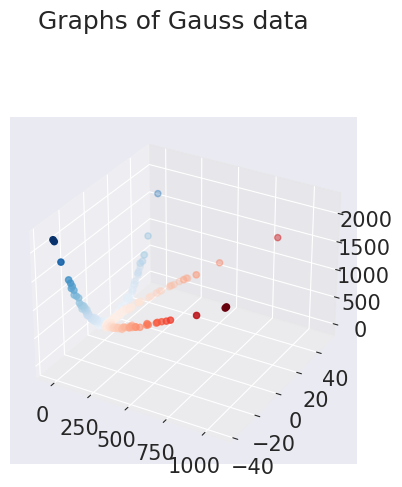

In [46]:
# %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
x=file1[:,0]
y=file1[:,1]
z=file1[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = plt.axes(projection='3d')
fig.suptitle("Graphs of Gauss data", y=1.12)
# ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Blues')
ax.scatter3D(newx, newy, newz, c=newz, cmap='Reds');

